In [ ]:
pip install plotly
pip install kneed

In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import scipy.stats
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from collections import defaultdict
from sklearn.cluster import KMeans
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from kneed import KneeLocator

In [2]:
city_years = {
 'Sri_Lanka':[2016,2017,2018,2019,2020,2021,2022,2023],
}

In [3]:
path = '/Users/zahrafarook/Desktop/DataAnalysis/data/Sri_Lanka/Colombo'
dir_list = os.listdir(path)
print(dir_list)

['Colombo_Sri_Lanka_2023.csv', 'Colombo_Sri_Lanka_2022.csv', 'Colombo_Sri_Lanka_2020.csv', 'Colombo_Sri_Lanka_2021.csv', 'Colombo_Sri_Lanka_2019.csv', 'Colombo_Sri_Lanka_2018.csv', 'Colombo_Sri_Lanka_2016.csv', 'Colombo_Sri_Lanka_2017.csv']


In [4]:
dfs = defaultdict(dict)
dfall = []


for city, years in city_years.items():
    for year in years:
        print("Loading: ", city, year)

        df = pd.read_csv("/Users/zahrafarook/Desktop/DataAnalysis/data/Sri_Lanka/Colombo/Colombo_{}_{}.csv".format(city, year))
       
        #creating a column to add weekend or weekday
        df['time_observed_at'] = pd.to_datetime(df['time_observed_at'], utc=True)
        df['day_of_week'] = df['time_observed_at'].dt.dayofweek
        df['day_type'] = df['time_observed_at'].apply(lambda x: 'Weekend' if x.weekday() in [5, 6] else 'Weekday')
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['Sri_Lanka'][2016].head()

Loading:  Sri_Lanka 2016
Loading:  Sri_Lanka 2017
Loading:  Sri_Lanka 2018
Loading:  Sri_Lanka 2019
Loading:  Sri_Lanka 2020
Loading:  Sri_Lanka 2021
Loading:  Sri_Lanka 2022
Loading:  Sri_Lanka 2023


,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,2816203,2016-01-02,2016-01-02,NaT,Pacific/Honolulu,2016-03-22T01:17:02-10:00,2022-05-17T05:02:31-10:00,GLYPHODES BIVITRALIS \r\nGlyphodes bivitralis ...,52446,research,...,species,124281,True,False,False,657,657,"[{'user_id': 52446, 'category': 'improving', '...",NaN,Weekday
1,2816208,2016-01-27,2016-01-27,NaT,Pacific/Honolulu,2016-03-22T01:29:44-10:00,2024-06-20T14:47:22-10:00,"Epicrocis sp.\r\n Pyralidae, Phycitinae",52446,needs_id,...,genus,122926,False,False,False,587,587,"[{'user_id': 52446, 'category': 'improving', '...",NaN,Weekday
2,3631812,2016/07/06 3:19 AM HST,2016-07-06,2016-07-06 13:19:00+00:00,Pacific/Honolulu,2016-07-06T03:46:41-10:00,2019-01-10T02:03:02-10:00,Caterpillar feeds on Ixora coccinea (Rubiaceae),52446,needs_id,...,genus,124038,False,False,False,960,960,"[{'user_id': 8828, 'category': 'improving', 'd...",2.0,Weekday
3,3653029,2016/07/10 2:50 PM +0530,2016-07-10,2016-07-10 09:20:00+00:00,Asia/Kolkata,2016-07-10T14:53:13+05:30,2024-06-24T04:04:36+05:30,Achrosis sp.\nAchrosis is a genus of moth in t...,52446,needs_id,...,genus,124038,False,False,False,960,960,"[{'user_id': 52446, 'category': 'improving', '...",6.0,Weekend
4,3659537,2016/07/11 1:12 AM HST,2016-07-11,2016-07-11 11:12:00+00:00,Pacific/Honolulu,2016-07-11T01:24:50-10:00,2024-06-23T12:32:48-10:00,NaN,52446,needs_id,...,tribe,48847,False,False,False,38880,38880,"[{'user_id': 52446, 'category': 'leading', 'di...",0.0,Weekday


In [5]:
sf_2016 = dfs['Sri_Lanka'][2016]
sf_2017 = dfs['Sri_Lanka'][2017]
sf_2018 = dfs['Sri_Lanka'][2018]
sf_2019 = dfs['Sri_Lanka'][2019]
sf_2020 = dfs['Sri_Lanka'][2020]
sf_2021 = dfs['Sri_Lanka'][2021]
sf_2022 = dfs['Sri_Lanka'][2022]
sf_2023 = dfs['Sri_Lanka'][2023]

In [6]:
sf_2016.head()

,id,observed_on_string,observed_on,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,quality_grade,...,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications,day_of_week,day_type
0,2816203,2016-01-02,2016-01-02,NaT,Pacific/Honolulu,2016-03-22T01:17:02-10:00,2022-05-17T05:02:31-10:00,GLYPHODES BIVITRALIS \r\nGlyphodes bivitralis ...,52446,research,...,species,124281,True,False,False,657,657,"[{'user_id': 52446, 'category': 'improving', '...",NaN,Weekday
1,2816208,2016-01-27,2016-01-27,NaT,Pacific/Honolulu,2016-03-22T01:29:44-10:00,2024-06-20T14:47:22-10:00,"Epicrocis sp.\r\n Pyralidae, Phycitinae",52446,needs_id,...,genus,122926,False,False,False,587,587,"[{'user_id': 52446, 'category': 'improving', '...",NaN,Weekday
2,3631812,2016/07/06 3:19 AM HST,2016-07-06,2016-07-06 13:19:00+00:00,Pacific/Honolulu,2016-07-06T03:46:41-10:00,2019-01-10T02:03:02-10:00,Caterpillar feeds on Ixora coccinea (Rubiaceae),52446,needs_id,...,genus,124038,False,False,False,960,960,"[{'user_id': 8828, 'category': 'improving', 'd...",2.0,Weekday
3,3653029,2016/07/10 2:50 PM +0530,2016-07-10,2016-07-10 09:20:00+00:00,Asia/Kolkata,2016-07-10T14:53:13+05:30,2024-06-24T04:04:36+05:30,Achrosis sp.\nAchrosis is a genus of moth in t...,52446,needs_id,...,genus,124038,False,False,False,960,960,"[{'user_id': 52446, 'category': 'improving', '...",6.0,Weekend
4,3659537,2016/07/11 1:12 AM HST,2016-07-11,2016-07-11 11:12:00+00:00,Pacific/Honolulu,2016-07-11T01:24:50-10:00,2024-06-23T12:32:48-10:00,NaN,52446,needs_id,...,tribe,48847,False,False,False,38880,38880,"[{'user_id': 52446, 'category': 'leading', 'di...",0.0,Weekday


# Calculate participation

## Get number of observations and identifications

In [7]:
def get_obs_ident_per_users(dfcity,year):
    """ Calculate the number of observations and identifications per user 
    
    Input:
    ------
     - dfcity: pd.DataFrame
         The observations data for one city.
     - year: int
         The year corresponding to the observations data.
    
    Returns:
    -------
     - dfobsident: pd.DataFrame
         Has the columns: user_id | year | n_obs | n_idents
    """
    
    n_obs = defaultdict(int)
    n_idents = defaultdict(int)
    
    for _, row in dfcity.iterrows():
        # Total count of observation made by each users
        user_obs = row['user_id']
        n_obs[user_obs] += 1 # Increment observation count for the user
        
        # Total identification user made
        identifications = row['identifications']
        if not pd.isnull(identifications):  # Check if 'identifications' is not NaN
            identifications = eval(identifications)
            for ident in identifications:
                user_ident = ident['user_id']
                if user_ident != user_obs:
                    n_idents[user_ident] += 1 # Increment identification count for the user
    
    # Aggregating results into a list of dictionaries
    obs_ident_list = []
    for user_id, obs_count in n_obs.items():
        obs_ident_list.append({
            'user_id': user_id,
            'n_obs': obs_count,
            'n_idents': n_idents[user_id],
            'day_type': row['day_type'],  # Include the 'day_type' column in the result
            'year': year,
            'time_observed_at': row['time_observed_at']
            
            
        })
    
    # Create DataFrame from the list of dictionaries
    dfobsident = pd.DataFrame(obs_ident_list)
    
    return dfobsident

In [8]:
# Initialize empty dictionary to store results for each year
sf_dataframes = {}

# Iterate over the years
for year in range(2016, 2024):
    # Extract DataFrame for the current year and city 'SF'
    dfcity = dfs['Sri_Lanka'][year]
    # Process data for the current year
    sf_dataframes[year] = get_obs_ident_per_users(dfcity, year)

#access dataframe for each year

In [9]:
sf_2016 = sf_dataframes[2016]
sf_2017 = sf_dataframes[2017]
sf_2018 = sf_dataframes[2018]
sf_2019 = sf_dataframes[2019]
sf_2020 = sf_dataframes[2020]
sf_2021 = sf_dataframes[2021]
sf_2022 = sf_dataframes[2022]
sf_2023 = sf_dataframes[2023]

In [10]:
df= [sf_2016,sf_2017,sf_2018,sf_2019,sf_2020,sf_2021,sf_2022,sf_2023]

In [11]:
#Test with SF_2016 dataset 

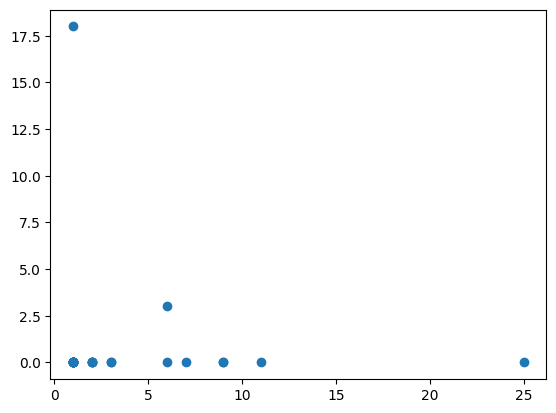

In [12]:
#Plot
plt.scatter(sf_2016['n_obs'],sf_2016['n_idents'])

In [13]:
km = KMeans(n_clusters =4)
km

KMeans(n_clusters=4)

In [ ]:
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
sf_2016['cluster'] = y_predicted
sf_2016.head()

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]

df4 = sf_2016[sf_2016.cluster==3]
plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')


### Normalise the data 

In [13]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the specified columns
scaler.fit(sf_2016[['n_obs', 'n_idents']])

# Transform the specified columns using the scaler
sf_2016[['n_obs', 'n_idents']] = scaler.transform(sf_2016[['n_obs', 'n_idents']])
sf_2016.head()

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,1704,0.000185,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
1,5844,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
2,11548,0.000370,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00
3,16603,0.023691,0.009149,Weekday,2016,2016-01-12 20:41:00+00:00
4,38816,0.000000,0.000000,Weekday,2016,2016-01-12 20:41:00+00:00


In [ ]:
km = KMeans(n_clusters =4)
y_predicted = km.fit_predict(sf_2016[['n_obs','n_idents']])
y_predicted

In [ ]:
km.cluster_centers_

In [ ]:
df1 = sf_2016[sf_2016.cluster==0]
df2 = sf_2016[sf_2016.cluster==1]
df3 = sf_2016[sf_2016.cluster==2]
df4 = sf_2016[sf_2016.cluster==3]

plt.scatter(df1['n_obs'],df1['n_idents'], color = 'green')
plt.scatter(df2['n_obs'],df2['n_idents'], color = 'red')
plt.scatter(df3['n_obs'],df3['n_idents'], color = 'yellow')
plt.scatter(df4['n_obs'],df4['n_idents'], color = 'black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple',marker='*', label='centroid')

plt.xlabel('Observation')
plt.ylabel('Identification')
plt.legend()

### Elbow plot method to see the optimial number of clusters

In [ ]:
#define k range
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(sf_2016[['n_obs','n_idents']])
    sse.append(km.inertia_)
    
# Find the optimal number of clusters using KneeLocator
kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
optimal_k = kneedle.elbow

# Print the optimal number of clusters
print(f"The optimal number of clusters is {optimal_k}")

In [ ]:
sse

In [ ]:
#plot
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse, marker='o', label='SSE')
plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.title('Elbow Method For Optimal k for SF 2016')
plt.legend()
plt.show()

In [ ]:
#https://www.youtube.com/watch?v=EItlUEPCIzM&t=557s

# K-means step by Step

# Data Collection & Analysis

## Preprocess data for K-means without log transformation

In [13]:
def selectfeature(df):
    # Select variables 
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std

# Test dataframe
data = selectfeature(sf_2016)
#print(data)

In [14]:
featured_data = selectfeature(sf_2016)
featured_data

,user_id,n_obs,n_idents
20,8828,0.000000,1.000000
0,52446,0.333333,0.000000
2,109891,0.250000,0.000000
3,207133,0.208333,0.000000
1,275051,0.000000,0.000000
4,279977,0.208333,0.166667
5,283671,0.416667,0.000000
17,496767,0.000000,0.000000
8,625799,0.333333,0.000000
7,730125,0.041667,0.000000


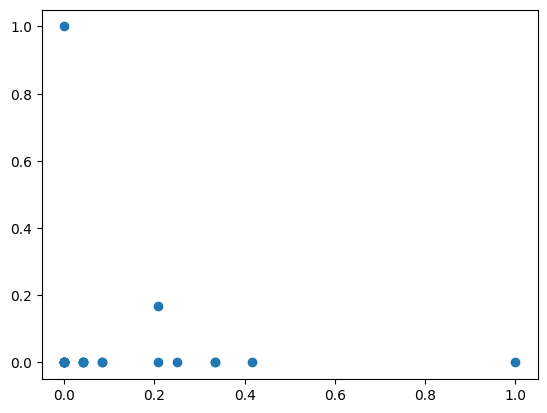

In [15]:
plt.scatter(featured_data['n_obs'],featured_data['n_idents'])

## Choosing the optimal number of clusters

In [16]:
def determine_k_clusters(df, feature_columns, plot=True):
    """
    Determines the optimal number of clusters using the Elbow Method.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the data to be clustered.
    feature_columns (list): A list of column names to be used as features for clustering.
    plot (bool): Whether to plot the Elbow Method graph. Default is True.

    Returns:
    list: A list of SSE values for each number of clusters in k_range.
    int: The optimal number of clusters.
    """
    k_range = range(1, 11)
    sse = []

    for k in k_range:
        km = KMeans(n_clusters=k)
        km.fit(df[feature_columns])
        sse.append(km.inertia_)

    # Find the optimal number of clusters using KneeLocator
    kneedle = KneeLocator(k_range, sse, curve="convex", direction="decreasing")
    optimal_k = kneedle.elbow

    # Print the optimal number of clusters
    print(f"The optimal number of clusters is {optimal_k}")

    # Plot the SSE against k values and mark the optimal number of clusters
    if plot:
        plt.figure(figsize=(5, 4))
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Sum of squared error (SSE)')
        plt.plot(k_range, sse, marker='o', label='SSE')
        plt.axvline(x=optimal_k, color='r', linestyle='--', label=f'Optimal k = {optimal_k}')
        #plt.text(optimal_k, max(sse)/2, f'Optimal k={optimal_k}', color='red')
        plt.title(f'Optimal number of K - {year}', fontsize=12)
        plt.xticks(k_range)
        plt.grid(True)
        plt.legend()
        plt.show()

    return sse, optimal_k

In [17]:
def process_dataframe(df, year):
    # Selected data
    df_data = selectfeature(df)
    print(f"Processed DataFrame for year {year}:")
    print(df_data.head())

    # Determine optimal number of clusters
    sse, optimal_k = determine_k_clusters(df_data, feature_columns=['n_obs', 'n_idents'])
    
    return df_data, sse, optimal_k

Processed DataFrame for year 2016:
    user_id     n_obs  n_idents
20     8828  0.000000       1.0
0     52446  0.333333       0.0
2    109891  0.250000       0.0
3    207133  0.208333       0.0
1    275051  0.000000       0.0
The optimal number of clusters is 4


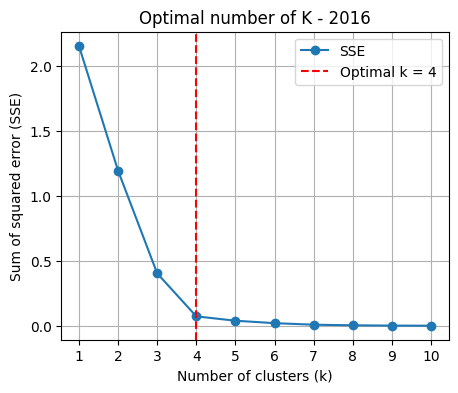

SSE for year 2016: [2.1590277777777778, 1.196469907407407, 0.40383454106280187, 0.07216775599128539, 0.03860294117647059, 0.01979507080610022, 0.007812499999999998, 0.0031828703703703706, 0.0008680555555555546, 2.6481536735324493e-33], Optimal k: 4
Processed DataFrame for year 2017:
    user_id     n_obs  n_idents
1      4857  0.033333  0.000000
15     8828  0.066667  0.304348
0     52446  0.166667  0.000000
5    109891  0.300000  0.000000
28   137880  0.000000  0.000000
The optimal number of clusters is 3


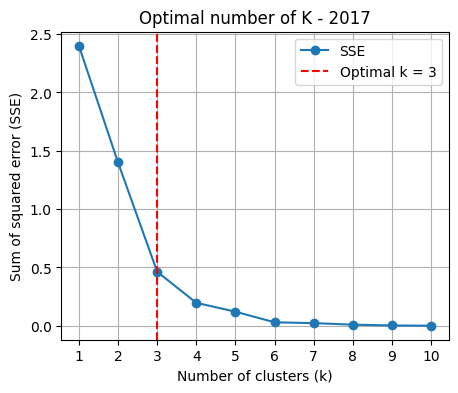

SSE for year 2017: [2.4000149200761935, 1.3999524469649232, 0.46316626409017714, 0.19706649589508965, 0.12119503160145882, 0.03015873015873016, 0.02319444444444444, 0.010158730158730159, 0.003194444444444443, 0.0009722222222222226], Optimal k: 3
Processed DataFrame for year 2018:
    user_id     n_obs  n_idents
4      8828  1.000000  0.192308
30    19061  0.000000  0.000000
25    24302  0.000000  0.000000
26    37233  0.020202  0.000000
27    52446  0.020202  0.000000
The optimal number of clusters is 3


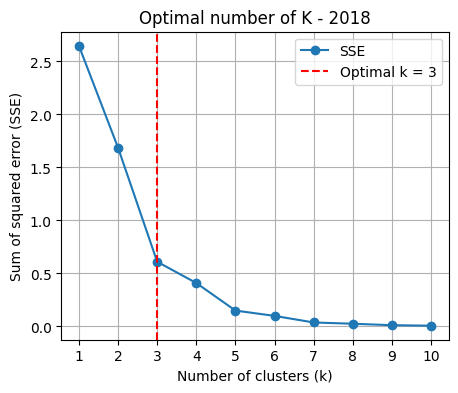

SSE for year 2018: [2.6487649119336534, 1.6870599836296696, 0.6105224915741322, 0.40959464223573844, 0.14989168124172017, 0.09948168051120657, 0.037575040253298095, 0.02552149119508701, 0.011954065358372495, 0.006908223327220997], Optimal k: 3
Processed DataFrame for year 2019:
    user_id     n_obs  n_idents
30     5365  0.238806  0.000000
1      8828  0.716418  0.327703
20    10210  0.000000  0.000000
34    17160  0.000000  0.000000
19    52446  0.018657  0.000000
The optimal number of clusters is 3


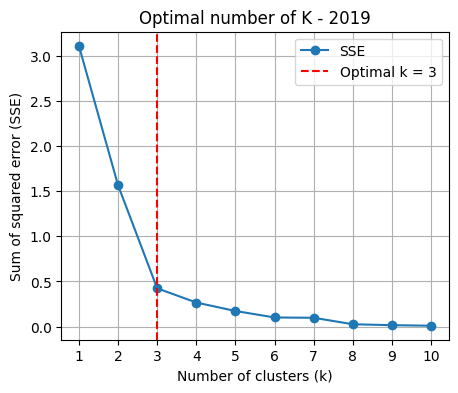

SSE for year 2019: [3.1105405589756825, 1.5660687458187932, 0.42374299000139115, 0.26656434599126533, 0.17266041455453035, 0.10104747009700489, 0.09763367872232485, 0.0260207342647994, 0.015710022182714924, 0.009706036537578205], Optimal k: 3
Processed DataFrame for year 2020:
     user_id     n_obs  n_idents
0       8828  0.373609  0.218627
97     15101  0.000000  0.000000
109    17160  0.001590  0.000000
52     52446  0.012719  0.000000
4      56488  0.009539  1.000000
The optimal number of clusters is 3


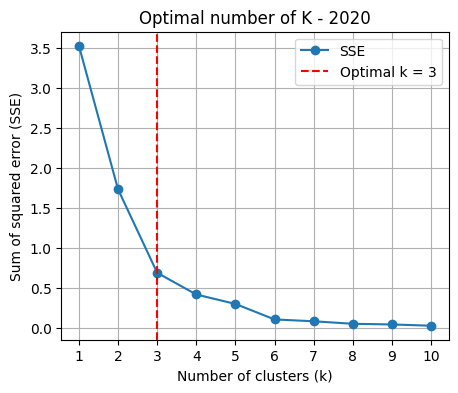

SSE for year 2020: [3.5287995981484173, 1.7337929384466733, 0.6892980919116681, 0.4182370442612657, 0.30011279047416783, 0.10618725807594509, 0.08351311661942262, 0.05186373487455388, 0.04368962986835609, 0.027850148361733357], Optimal k: 3
Processed DataFrame for year 2021:
     user_id     n_obs  n_idents
86      8828  0.096718  0.268065
113    15101  0.001727  0.000000
165    17160  0.000000  0.000000
10     56488  0.003454  1.000000
110   109891  0.001727  0.000000
The optimal number of clusters is 4


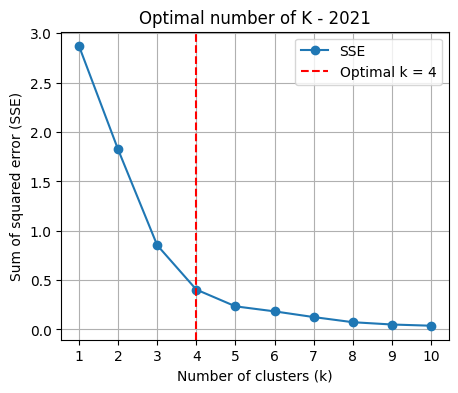

SSE for year 2021: [2.8748614310128464, 1.8246105451950934, 0.8537006829532425, 0.4037161612935444, 0.23396207708389002, 0.18297517996949825, 0.12511816876170911, 0.07311420925002472, 0.04983555457302173, 0.037553291174831124], Optimal k: 4
Processed DataFrame for year 2022:
     user_id     n_obs  n_idents
19      8828  0.122905  0.210454
18     17160  0.002793  0.000000
83     69769  0.324022  0.000000
110   343320  0.078212  0.019257
4     550489  0.011173  0.000000
The optimal number of clusters is 3


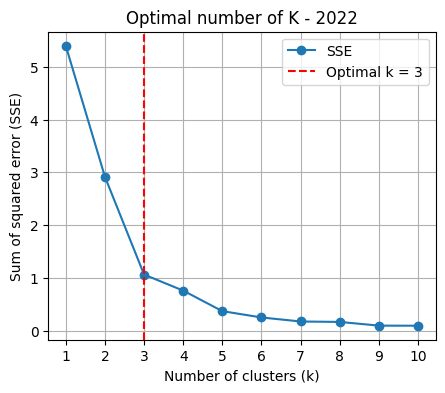

SSE for year 2022: [5.401695708600962, 2.9178187901137216, 1.0615431052597093, 0.7566957046086843, 0.36717417347747283, 0.247604102666248, 0.17113978177012085, 0.16280636731749906, 0.09267012280434286, 0.09089980485589406], Optimal k: 3
Processed DataFrame for year 2023:
     user_id     n_obs  n_idents
192     3016  0.000000  0.000000
9       8828  0.191617  0.061155
1      69769  0.095808  0.000000
125    91849  0.000000  0.000000
208   201551  0.035928  0.000000
The optimal number of clusters is 3


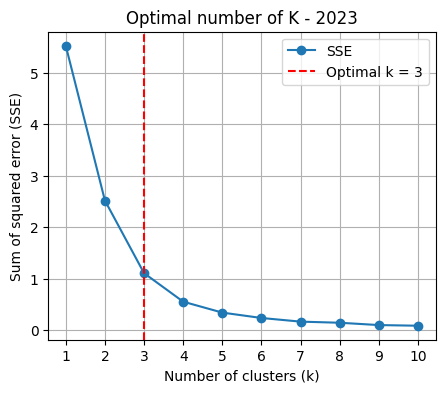

SSE for year 2023: [5.522370128606519, 2.519045313703786, 1.1096209828294612, 0.5559682046612389, 0.3441324875887588, 0.23981112085499057, 0.1690468892440816, 0.1473288326998981, 0.10237521967662952, 0.08972963796944443], Optimal k: 3


In [18]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


# Call the function for all DataFrames
for df, year in zip(df_list, years):
    #rocess the DataFrame , see, and optimal number of cluster
    df_processed,sse, optimal_k = process_dataframe(df, year)
    print(f"SSE for year {year}: {sse}, Optimal k: {optimal_k}")

## Combine dataframe as one from year 2016- 2023

Processed DataFrame for year combined:
     user_id     n_obs  n_idents
192     3016  0.000000  0.000000
1       4857  0.001590  0.000000
30      5365  0.101749  0.000000
15      8828  0.003180  0.006863
20      8828  0.000000  0.017647
The optimal number of clusters is 3


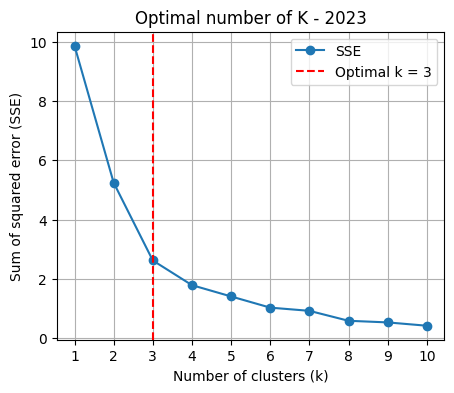

SSE for combined data: [9.858132163611517, 5.244210791547534, 2.6238182161554766, 1.792726321800642, 1.4124180069332604, 1.0355121981934206, 0.927783467518845, 0.5928214393125372, 0.537763452262481, 0.4262301378341772], Optimal k: 3


In [19]:
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]

# merge all DataFrames
combined_df = pd.concat(df_list)

# Verify the combined DataFrame
#print("Combined DataFrame:")
#print(combined_df)

# Call the function on the combined DataFrame
df_combined_processed, sse_combined, optimal_k_combined = process_dataframe(combined_df, "combined")

print(f"SSE for combined data: {sse_combined}, Optimal k: {optimal_k_combined}")

In [20]:
# merge all DataFrames
combined_df = pd.concat(df_list)
combined_df

,user_id,n_obs,n_idents,day_type,year,time_observed_at
0,52446,9,0,Weekday,2016,NaN
1,275051,1,0,Weekday,2016,NaN
2,109891,7,0,Weekday,2016,NaN
3,207133,6,0,Weekday,2016,NaN
4,279977,6,3,Weekday,2016,NaN
...,...,...,...,...,...,...
215,8045462,17,1,Weekday,2023,2023-07-06 09:28:00+00:00
216,8127063,24,1,Weekday,2023,2023-07-06 09:28:00+00:00
217,8164646,1,0,Weekday,2023,2023-07-06 09:28:00+00:00
218,7495762,1,0,Weekday,2023,2023-07-06 09:28:00+00:00



# Training the k-Means Clustering Model
##  Optimum Number of Clusters = 3

### Perform K-means with optimal number of clusters 3 without log transfer

In [23]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=30, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters Sri Lanka- {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
      n_obs  n_idents
0  0.09058  0.007246
1  1.00000  0.000000
2  0.00000  1.000000
Sum of Squared Error (SSE): 0.40383454106280187


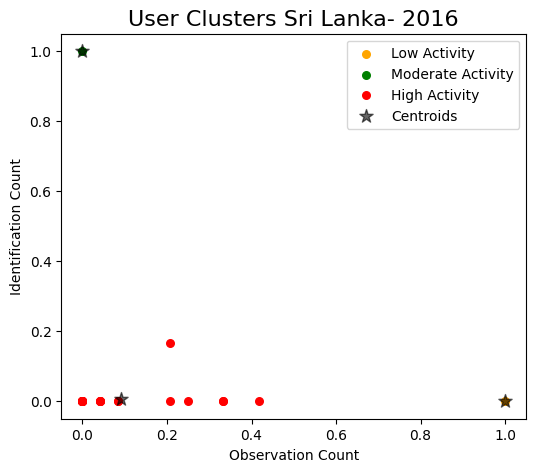

Centroids:
       n_obs  n_idents
0  0.566667  0.000000
1  0.031944  0.012681
2  0.000000  1.000000
Sum of Squared Error (SSE): 0.46316626409017714


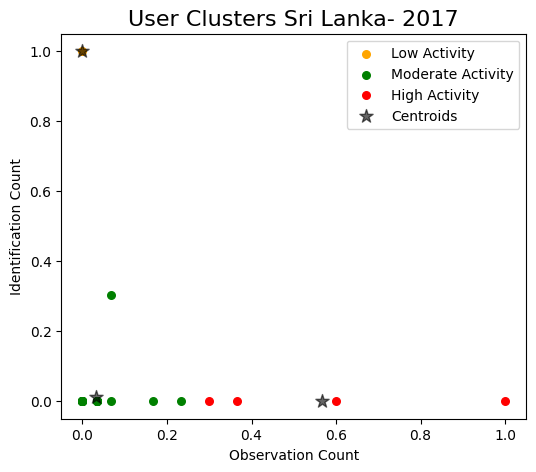

Centroids:
       n_obs  n_idents
0  0.016965  0.011341
1  0.000000  1.000000
2  0.622896  0.085470
Sum of Squared Error (SSE): 0.6105224915741322


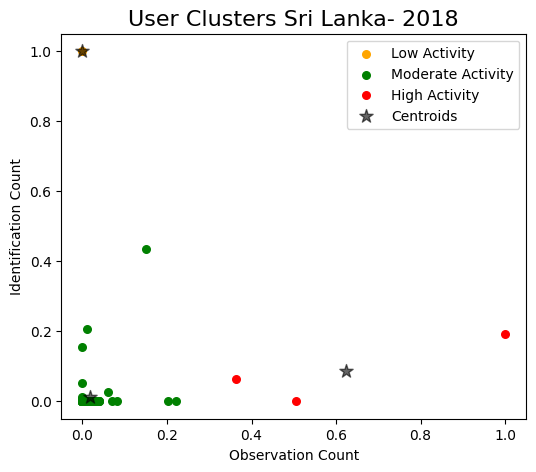

Centroids:
       n_obs  n_idents
0  0.019734  0.006304
1  0.858209  0.163851
2  0.007463  0.810811
Sum of Squared Error (SSE): 0.42374299000139115


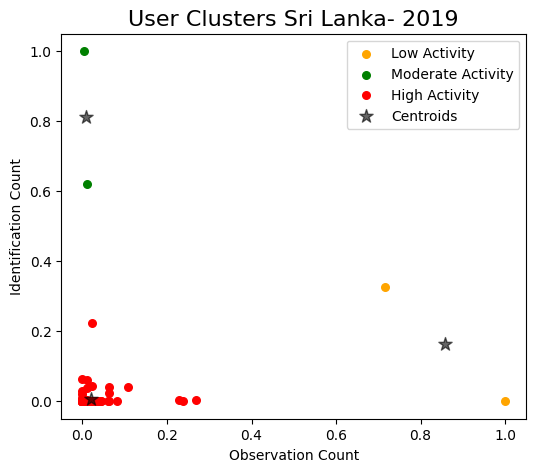

Centroids:
       n_obs  n_idents
0  0.021312  0.004160
1  0.006359  0.785948
2  1.000000  0.125490
Sum of Squared Error (SSE): 0.7677694067623448


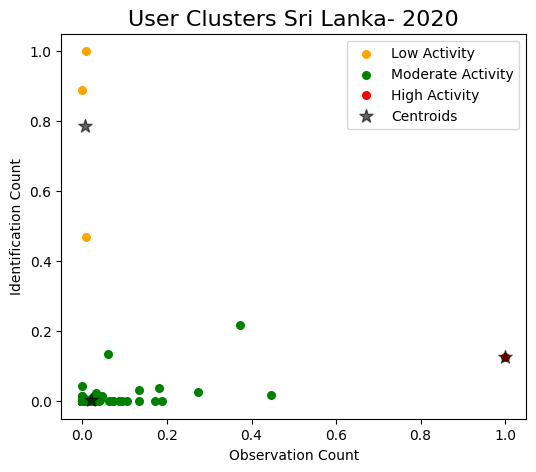

Centroids:
       n_obs  n_idents
0  0.020397  0.012124
1  1.000000  0.327506
2  0.003454  1.000000
Sum of Squared Error (SSE): 0.8537006829532425


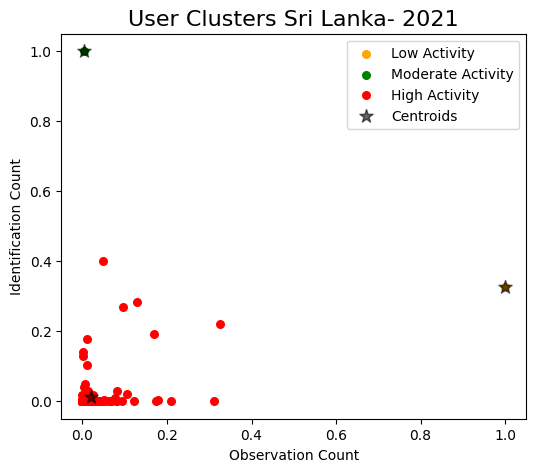

Centroids:
       n_obs  n_idents
0  0.018947  0.005054
1  0.814944  0.259972
2  0.004190  0.907153
Sum of Squared Error (SSE): 1.0615431052597093


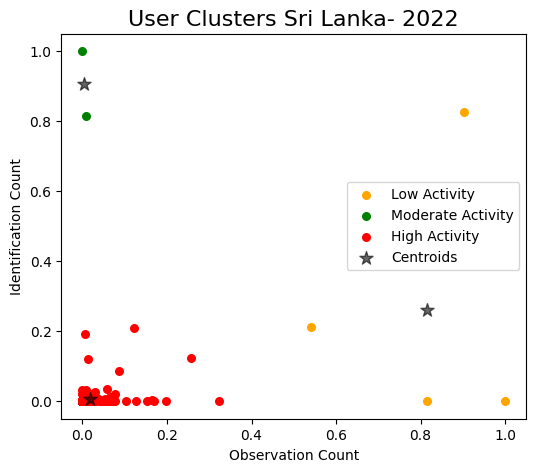

Centroids:
       n_obs  n_idents
0  0.031480  0.002826
1  0.657186  0.018969
2  0.245509  0.819932
Sum of Squared Error (SSE): 1.1096209828294612


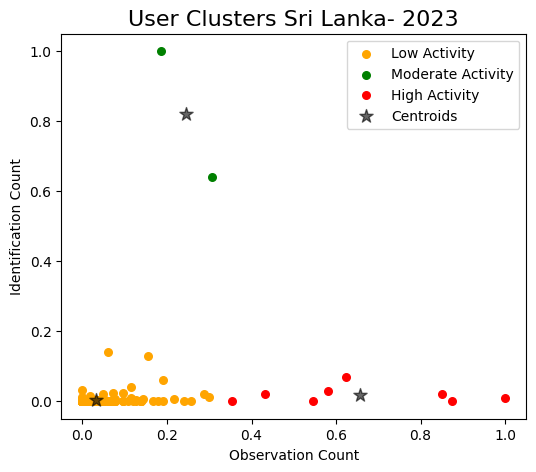

In [24]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_kmeans_clustering(df_processed, year)

## Perform K-means with optimal number of clusters 3 with log transformation

In [25]:
def log_transform(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Add +1 to avoid log(0)
    df_std['n_obs'] = df_std['n_obs'] + 1
    df_std['n_idents'] = df_std['n_idents'] + 1

    # Apply log transformation
    df_std['n_obs'] = np.log(df_std['n_obs'])
    df_std['n_idents'] = np.log(df_std['n_idents'])

    # Scale the log-transformed features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler


def reorder_labels(df, kmeans):
    # Get the indices to sort the centroids by `n_obs` and `n_idents`
    centroids = kmeans.cluster_centers_
    sorted_indices = np.argsort(centroids[:, 0])  # Sort by `n_obs`
    
    # Create a mapping from old labels to new labels
    new_labels = np.zeros_like(kmeans.labels_)
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[kmeans.labels_ == old_label] = new_label
    
    df['cluster'] = new_labels
    return df, centroids[sorted_indices]

def perform_kmeans_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Reorder labels -  Low Activity, Moderate Activity, and High Activity to be consistent
    df, ordered_centroids = reorder_labels(df, kmeans)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    # Get the centroid values
    centroids = kmeans.cluster_centers_

    # get the sum of the squared error (SSE or WCSS)
    sse = kmeans.inertia_

    # Create a dataframe from centroids for easier processing
    centroids_df = pd.DataFrame(centroids, columns=['n_obs', 'n_idents'])

    # Print centroids and SSE
    print("Centroids:\n", centroids_df)
    print(f"Sum of Squared Error (SSE): {sse}")
    
    # Plotting all the clusters and their Centroids
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=cluster_mapping[i])
        
    # Plot the centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, alpha=0.6, marker='*', label='Centroids')

    # Set title and labels
    plt.title(f'User Clusters Sri Lanka - {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df, sse


Centroids:
       n_obs      n_idents
0  0.068988  6.938894e-18
1  0.638687  6.725969e-02
2  0.000000  1.000000e+00
Sum of Squared Error (SSE): 0.5442980925265384


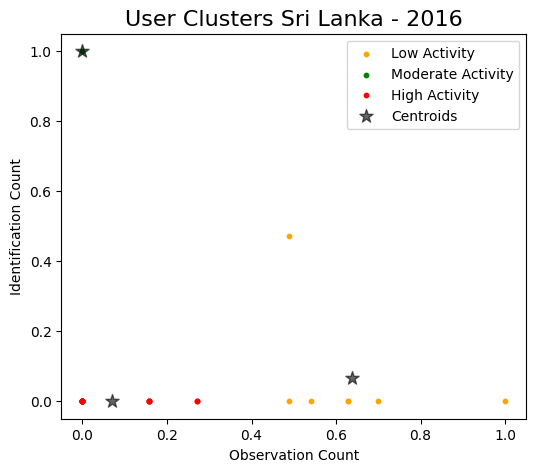

Centroids:
       n_obs      n_idents
0  0.685795  0.000000e+00
1  0.060652  6.938894e-18
2  0.125000  8.271564e-01
Sum of Squared Error (SSE): 0.42603272059171426


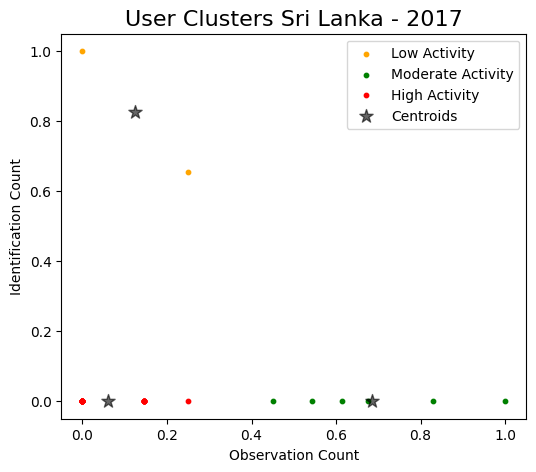

Centroids:
       n_obs  n_idents
0  0.077871  0.005695
1  0.765294  0.208921
2  0.129809  0.683491
Sum of Squared Error (SSE): 1.8161980941570528


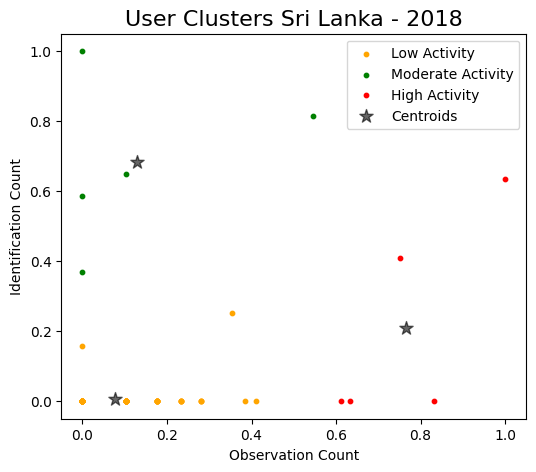

Centroids:
       n_obs  n_idents
0  0.455249  0.012815
1  0.064998  0.013578
2  0.301462  0.589534
Sum of Squared Error (SSE): 2.764593830284447


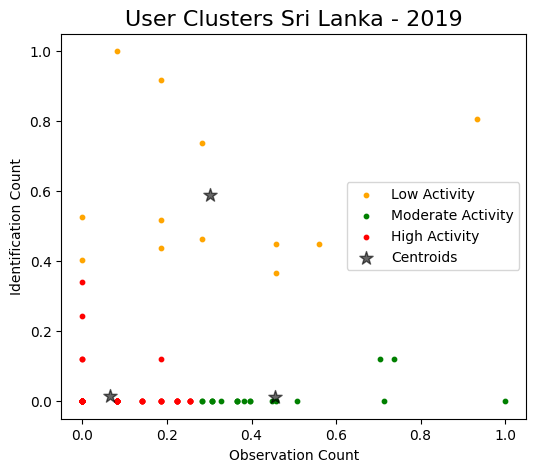

Centroids:
       n_obs  n_idents
0  0.054832  0.022710
1  0.414886  0.031481
2  0.560116  0.657237
Sum of Squared Error (SSE): 3.6204587352218067


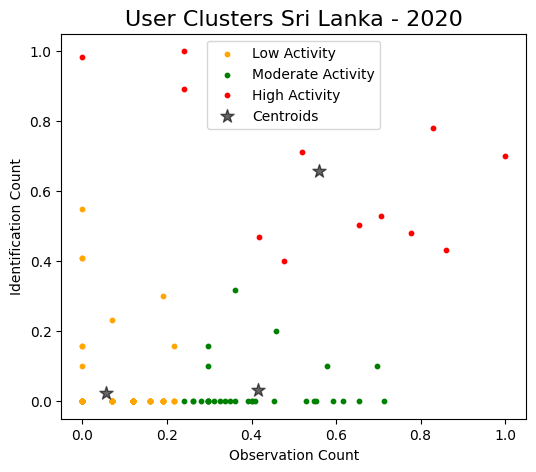

Centroids:
       n_obs  n_idents
0  0.060677  0.026049
1  0.403985  0.650789
2  0.405817  0.028712
Sum of Squared Error (SSE): 4.433002746743512


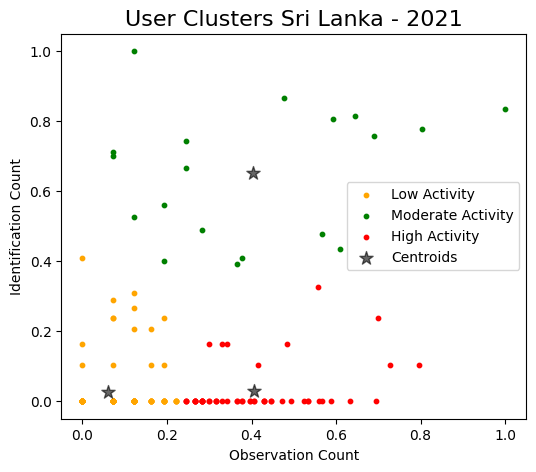

Centroids:
       n_obs  n_idents
0  0.071362  0.007247
1  0.443607  0.015711
2  0.351185  0.567562
Sum of Squared Error (SSE): 5.242057136477712


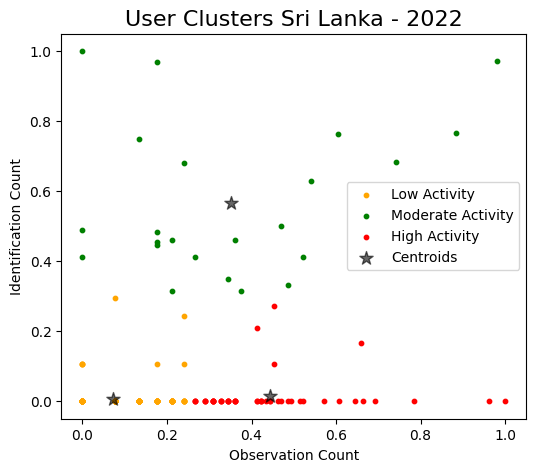

Centroids:
       n_obs  n_idents
0  0.362765  0.032056
1  0.031803  0.013354
2  0.681997  0.454892
Sum of Squared Error (SSE): 4.81600698575139


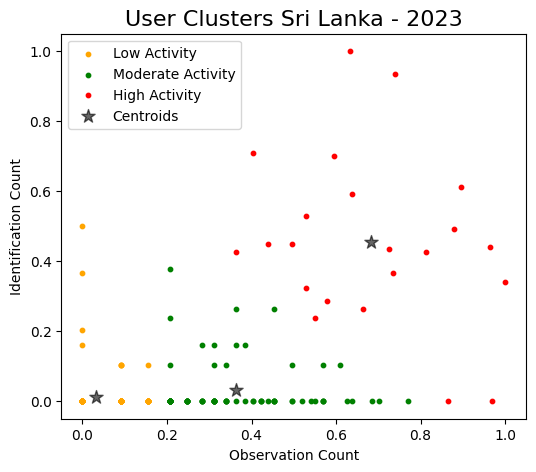

In [26]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = log_transform(df)
    perform_kmeans_clustering(df_processed, year)

Centroids:
       n_obs  n_idents
0  0.370056  0.025715
1  0.049178  0.014766
2  0.393714  0.562606
Sum of Squared Error (SSE): 20.347921030416956


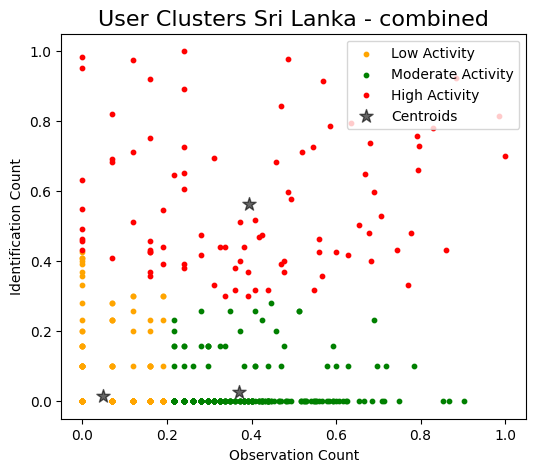

(     user_id     n_obs  n_idents  cluster     activity_level
 192     3016  0.000000  0.000000        0       Low Activity
 1       4857  0.070465  0.000000        0       Low Activity
 30      5365  0.607649  0.000000        1  Moderate Activity
 15      8828  0.120460  0.300127        0       Low Activity
 20      8828  0.000000  0.424973        0       Low Activity
 ..       ...       ...       ...      ...                ...
 216  8127063  0.438940  0.100042        1  Moderate Activity
 217  8164646  0.000000  0.000000        0       Low Activity
 81   8269917  0.000000  0.000000        0       Low Activity
 151  8269917  0.000000  0.000000        0       Low Activity
 219  8269917  0.190925  0.000000        0       Low Activity
 
 [1013 rows x 5 columns],
 20.347921030416956)

In [27]:
# Concatenate all the DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = log_transform(combined_df)

# Perform clustering with 3 clusters on combined data
perform_kmeans_clustering(df_combined_processed, "combined")

Centroids:
      n_obs  n_idents
0  0.09058  0.007246
1  1.00000  0.000000
2  0.00000  1.000000
Sum of Squared Error (SSE): 0.40383454106280187


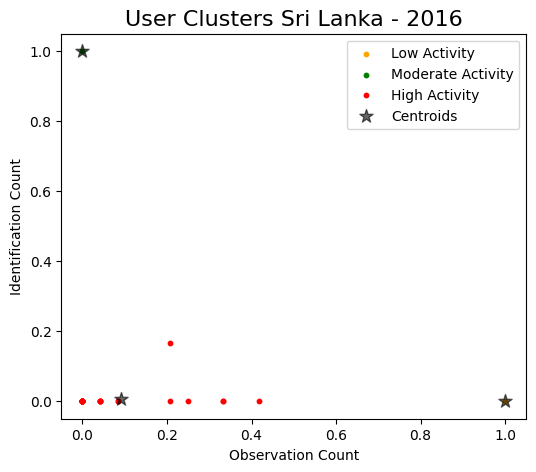

Year: 2016
(    user_id     n_obs  n_idents  cluster     activity_level
20     8828  0.000000  1.000000        1  Moderate Activity
0     52446  0.333333  0.000000        2      High Activity
2    109891  0.250000  0.000000        2      High Activity
3    207133  0.208333  0.000000        2      High Activity
1    275051  0.000000  0.000000        2      High Activity
4    279977  0.208333  0.166667        2      High Activity
5    283671  0.416667  0.000000        2      High Activity
17   496767  0.000000  0.000000        2      High Activity
8    625799  0.333333  0.000000        2      High Activity
7    730125  0.041667  0.000000        2      High Activity
6   1361699  0.000000  0.000000        2      High Activity
9   1652128  0.000000  0.000000        2      High Activity
15  1734434  0.000000  0.000000        2      High Activity
16  1989660  0.041667  0.000000        2      High Activity
10  2041315  0.000000  0.000000        2      High Activity
19  2080649  0.083333  0.000

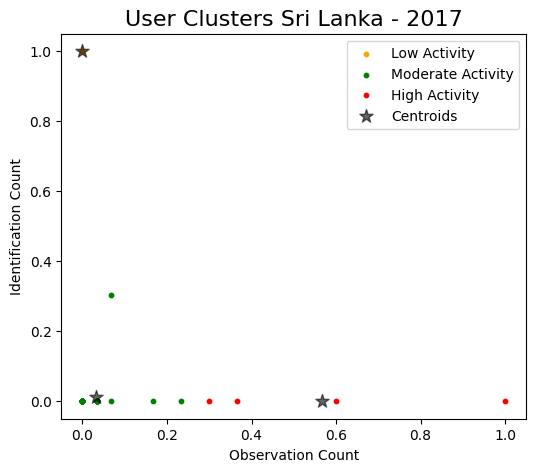

Year: 2017
(    user_id     n_obs  n_idents  cluster     activity_level
1      4857  0.033333  0.000000        1  Moderate Activity
15     8828  0.066667  0.304348        1  Moderate Activity
0     52446  0.166667  0.000000        1  Moderate Activity
5    109891  0.300000  0.000000        2      High Activity
28   137880  0.000000  0.000000        1  Moderate Activity
2    541234  0.000000  0.000000        1  Moderate Activity
3    625217  0.033333  0.000000        1  Moderate Activity
11   625799  1.000000  0.000000        2      High Activity
4    638405  0.000000  0.000000        1  Moderate Activity
6    722902  0.000000  0.000000        1  Moderate Activity
8    750428  0.000000  0.000000        1  Moderate Activity
7    793403  0.033333  0.000000        1  Moderate Activity
9   1067913  0.033333  0.000000        1  Moderate Activity
10  1125030  0.000000  0.000000        1  Moderate Activity
13  1352155  0.000000  0.000000        1  Moderate Activity
19  1540887  0.600000  0.000

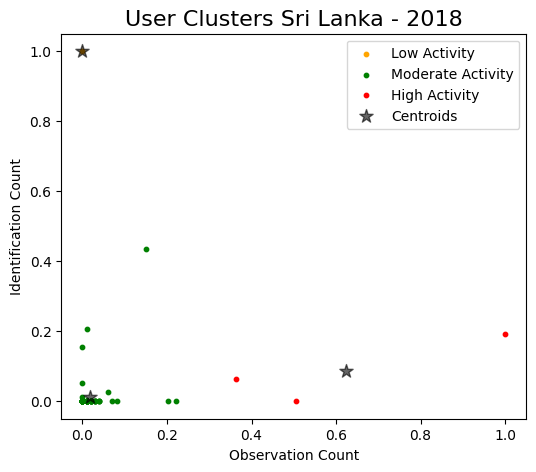

Year: 2018
(    user_id     n_obs  n_idents  cluster     activity_level
4      8828  1.000000  0.192308        2      High Activity
30    19061  0.000000  0.000000        1  Moderate Activity
25    24302  0.000000  0.000000        1  Moderate Activity
26    37233  0.020202  0.000000        1  Moderate Activity
27    52446  0.020202  0.000000        1  Moderate Activity
..      ...       ...       ...      ...                ...
73  6032836  0.000000  0.000000        1  Moderate Activity
76  7007449  0.020202  0.000000        1  Moderate Activity
77  7193541  0.000000  0.000000        1  Moderate Activity
80  8016619  0.010101  0.000000        1  Moderate Activity
81  8269917  0.000000  0.000000        1  Moderate Activity

[82 rows x 5 columns], 0.6105224915741322)
Centroids:
       n_obs  n_idents
0  0.019734  0.006304
1  0.858209  0.163851
2  0.007463  0.810811
Sum of Squared Error (SSE): 0.42374299000139115


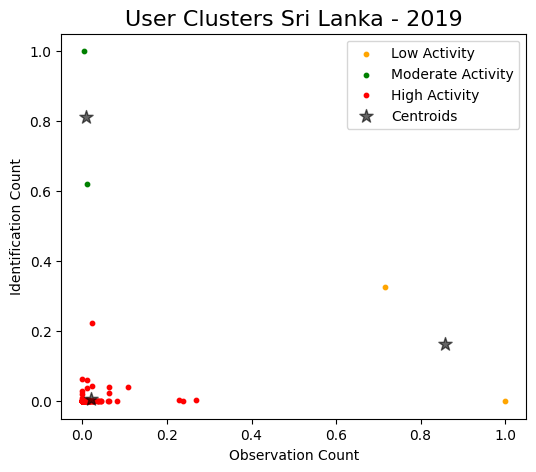

Year: 2019
(     user_id     n_obs  n_idents  cluster activity_level
30      5365  0.238806  0.000000        2  High Activity
1       8828  0.716418  0.327703        0   Low Activity
20     10210  0.000000  0.000000        2  High Activity
34     17160  0.000000  0.000000        2  High Activity
19     52446  0.018657  0.000000        2  High Activity
..       ...       ...       ...      ...            ...
92   5501292  0.000000  0.000000        2  High Activity
94   6032836  0.000000  0.000000        2  High Activity
99   6478402  0.026119  0.000000        2  High Activity
97   6585857  0.007463  0.000000        2  High Activity
100  7447085  0.000000  0.000000        2  High Activity

[101 rows x 5 columns], 0.42374299000139115)
Centroids:
       n_obs  n_idents
0  0.021312  0.004160
1  0.006359  0.785948
2  1.000000  0.125490
Sum of Squared Error (SSE): 0.7677694067623448


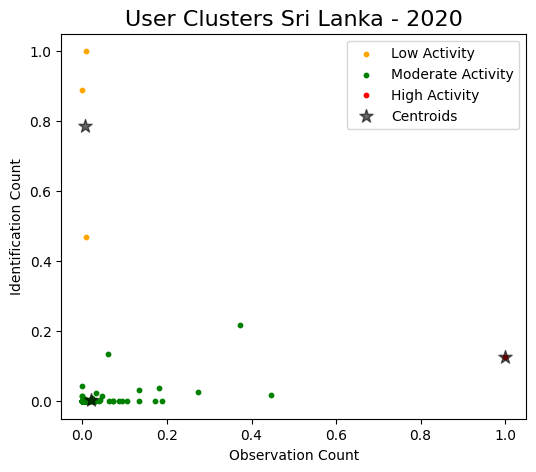

Year: 2020
(     user_id     n_obs  n_idents  cluster     activity_level
0       8828  0.373609  0.218627        1  Moderate Activity
97     15101  0.000000  0.000000        1  Moderate Activity
109    17160  0.001590  0.000000        1  Moderate Activity
52     52446  0.012719  0.000000        1  Moderate Activity
4      56488  0.009539  1.000000        0       Low Activity
..       ...       ...       ...      ...                ...
145  6030490  0.000000  0.000000        1  Moderate Activity
146  6032836  0.003180  0.000000        1  Moderate Activity
149  8045462  0.003180  0.000000        1  Moderate Activity
150  8127063  0.014308  0.000000        1  Moderate Activity
151  8269917  0.000000  0.000000        1  Moderate Activity

[152 rows x 5 columns], 0.7677694067623448)
Centroids:
       n_obs  n_idents
0  0.020397  0.012124
1  1.000000  0.327506
2  0.003454  1.000000
Sum of Squared Error (SSE): 0.8537006829532425


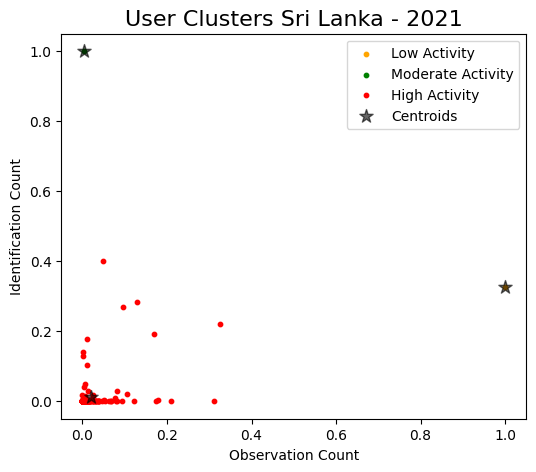

Year: 2021
(     user_id     n_obs  n_idents  cluster     activity_level
86      8828  0.096718  0.268065        2      High Activity
113    15101  0.001727  0.000000        2      High Activity
165    17160  0.000000  0.000000        2      High Activity
10     56488  0.003454  1.000000        1  Moderate Activity
110   109891  0.001727  0.000000        2      High Activity
..       ...       ...       ...      ...                ...
181  7415858  0.000000  0.000000        2      High Activity
182  7595241  0.000000  0.000000        2      High Activity
183  7972462  0.000000  0.000000        2      High Activity
184  8045462  0.003454  0.000000        2      High Activity
185  8127063  0.093264  0.000000        2      High Activity

[186 rows x 5 columns], 0.8537006829532425)
Centroids:
       n_obs  n_idents
0  0.018947  0.005054
1  0.814944  0.259972
2  0.004190  0.907153
Sum of Squared Error (SSE): 1.0615431052597093


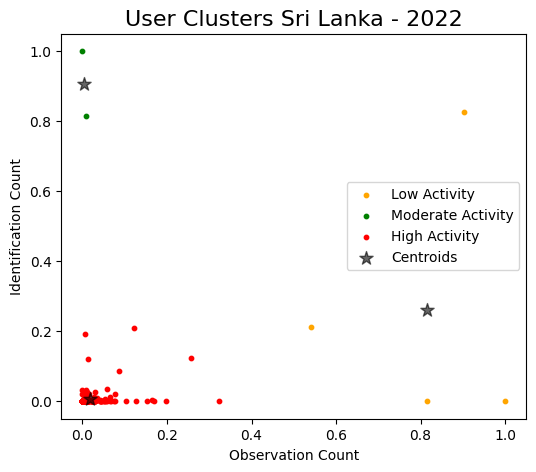

Year: 2022
(     user_id     n_obs  n_idents  cluster activity_level
19      8828  0.122905  0.210454        2  High Activity
18     17160  0.002793  0.000000        2  High Activity
83     69769  0.324022  0.000000        2  High Activity
110   343320  0.078212  0.019257        2  High Activity
4     550489  0.011173  0.000000        2  High Activity
..       ...       ...       ...      ...            ...
210  7370643  0.008380  0.031637        2  High Activity
211  7655926  0.000000  0.000000        2  High Activity
215  7972462  0.000000  0.000000        2  High Activity
216  8045462  0.005587  0.000000        2  High Activity
217  8127063  0.041899  0.004127        2  High Activity

[218 rows x 5 columns], 1.0615431052597093)
Centroids:
       n_obs  n_idents
0  0.031480  0.002826
1  0.657186  0.018969
2  0.245509  0.819932
Sum of Squared Error (SSE): 1.1096209828294612


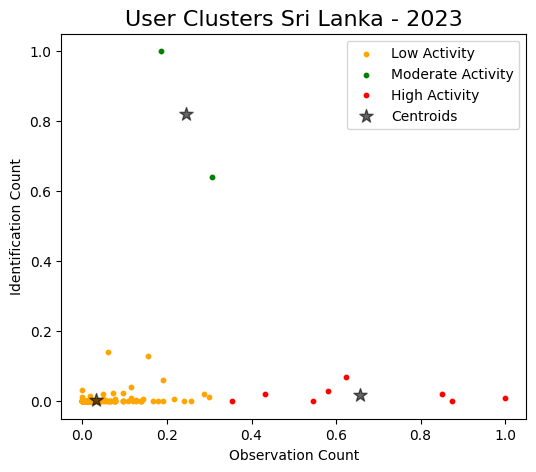

Year: 2023
(     user_id     n_obs  n_idents  cluster activity_level
192     3016  0.000000  0.000000        0   Low Activity
9       8828  0.191617  0.061155        0   Low Activity
1      69769  0.095808  0.000000        0   Low Activity
125    91849  0.000000  0.000000        0   Low Activity
208   201551  0.035928  0.000000        0   Low Activity
..       ...       ...       ...      ...            ...
206  7699943  0.431138  0.019253        2  High Activity
215  8045462  0.095808  0.001133        0   Low Activity
216  8127063  0.137725  0.001133        0   Low Activity
217  8164646  0.000000  0.000000        0   Low Activity
219  8269917  0.023952  0.000000        0   Low Activity

[220 rows x 5 columns], 1.1096209828294612)


In [28]:

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create a dictionary to store the processed DataFrames for each year
clustered_dfs = {}

# Process each DataFrame
for df, year in zip(df_list, years):
    df['year'] = year  # Add year information to handle manual reassignment
    df_processed, scaler = selectfeature(df)
    df_clustered = perform_kmeans_clustering(df_processed, year)
    
    # Store the resulting DataFrame in the dictionary
    clustered_dfs[year] = df_clustered

    # Print to verify (optional)
    print(f"Year: {year}")
    print(df_clustered)
    
    df_2016_clustered = clustered_dfs[2016]
    df_2016_clustered

In [29]:
df_2019_clustered = clustered_dfs[2019]
df_2019_clustered

(     user_id     n_obs  n_idents  cluster activity_level
 30      5365  0.238806  0.000000        2  High Activity
 1       8828  0.716418  0.327703        0   Low Activity
 20     10210  0.000000  0.000000        2  High Activity
 34     17160  0.000000  0.000000        2  High Activity
 19     52446  0.018657  0.000000        2  High Activity
 ..       ...       ...       ...      ...            ...
 92   5501292  0.000000  0.000000        2  High Activity
 94   6032836  0.000000  0.000000        2  High Activity
 99   6478402  0.026119  0.000000        2  High Activity
 97   6585857  0.007463  0.000000        2  High Activity
 100  7447085  0.000000  0.000000        2  High Activity
 
 [101 rows x 5 columns],
 0.42374299000139115)

In [30]:
df_2021_clustered = clustered_dfs[2021]
df_2021_clustered

(     user_id     n_obs  n_idents  cluster     activity_level
 86      8828  0.096718  0.268065        2      High Activity
 113    15101  0.001727  0.000000        2      High Activity
 165    17160  0.000000  0.000000        2      High Activity
 10     56488  0.003454  1.000000        1  Moderate Activity
 110   109891  0.001727  0.000000        2      High Activity
 ..       ...       ...       ...      ...                ...
 181  7415858  0.000000  0.000000        2      High Activity
 182  7595241  0.000000  0.000000        2      High Activity
 183  7972462  0.000000  0.000000        2      High Activity
 184  8045462  0.003454  0.000000        2      High Activity
 185  8127063  0.093264  0.000000        2      High Activity
 
 [186 rows x 5 columns],
 0.8537006829532425)

In [31]:
#

# AgglomerativeClustering

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering as AggClust
import sys

In [33]:

# Increase the recursion limit if needed 
sys.setrecursionlimit(100)

def selectfeature(df):# without log transformation
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Scale the features
    scaler = MinMaxScaler().fit(df_std[['n_obs', 'n_idents']])
    df_std[['n_obs', 'n_idents']] = scaler.transform(df_std[['n_obs', 'n_idents']])

    # Sort by user_id (optional, for consistency)
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def reorder_labels(df, labels):
    # Create a DataFrame 
    df_clusters = pd.DataFrame({'cluster': labels, 'n_obs': df['n_obs'], 'n_idents': df['n_idents']})

    # Calculate an aggregate metric (e.g., median) to sort clusters
    sorted_order = df_clusters.groupby('cluster').median().sort_values(by=['n_obs', 'n_idents']).index

    # Map old labels to new labels based on the sorted order
    new_labels = np.zeros_like(labels)
    for new_label, old_label in enumerate(sorted_order):
        new_labels[labels == old_label] = new_label
    
    df['cluster'] = new_labels
    return df

def perform_agglomerative_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Perform Agglomerative Clustering
    agglomerative = AggClust(n_clusters=3, metric='euclidean').fit(df[['n_obs', 'n_idents']])
    df['cluster'] = agglomerative.labels_
    
    # Reorder labels - Low Activity, Moderate Activity, and High Activity to be consistent
    df = reorder_labels(df, agglomerative.labels_)

    # Assign labels based on the reordered clusters
    cluster_mapping = {0: 'Low Activity', 1: 'Moderate Activity', 2: 'High Activity'}
    df['activity_level'] = df['cluster'].map(cluster_mapping)

    return df

def plot_clusters(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']   # Low Activity -> Moderate Activity -> High Activity
    
    # Plotting all the clusters
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], 
                    s=10, color=palette[i], label=df['activity_level'].unique()[i])
        
    # Set title and labels
    plt.title(f'Agglomerative Clustering - Sri Lanka {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()
    
def plot_dendrogram(df):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()


In [34]:
df_std, scaler = selectfeature(df)
df_clustered = perform_agglomerative_clustering(df_std, 2019)

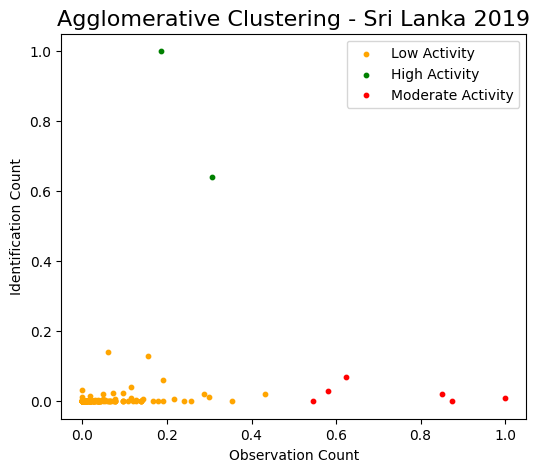

In [35]:
plot_cluster = plot_clusters(df_clustered,2019)

In [36]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_agglomerative_clustering(df_processed, year)


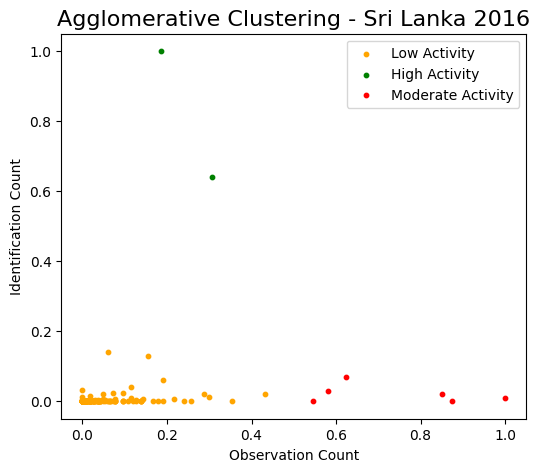

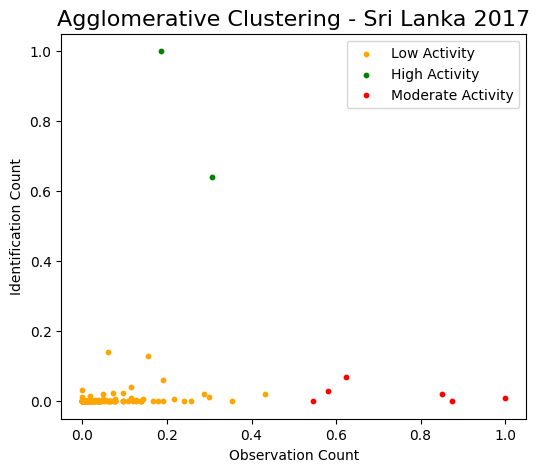

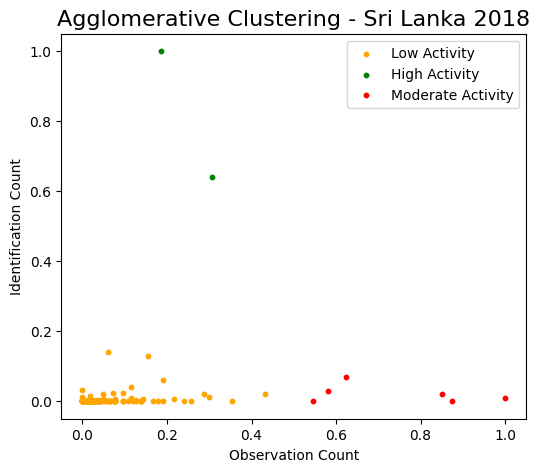

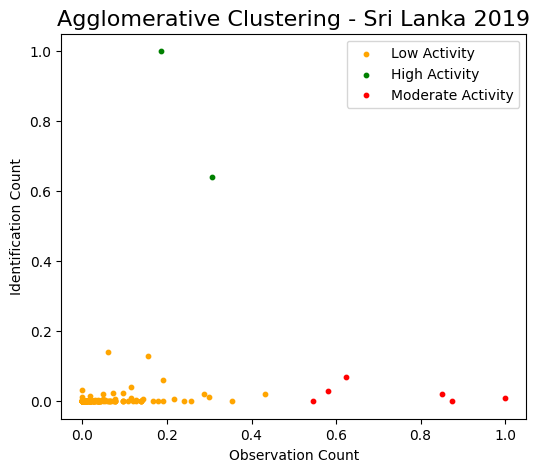

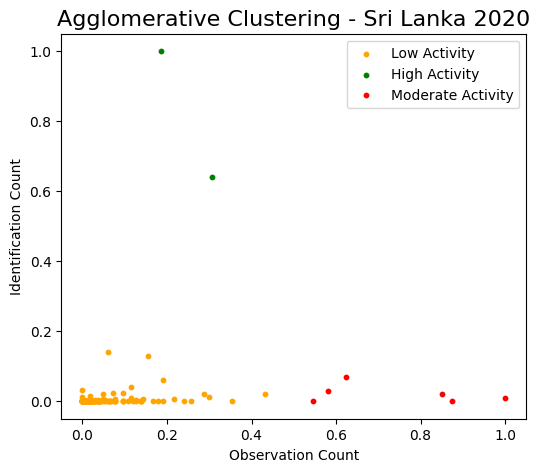

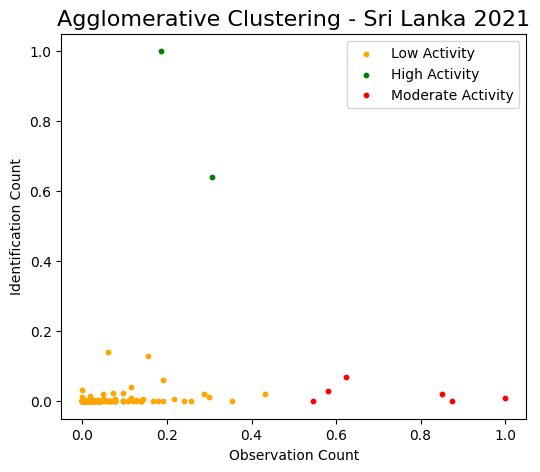

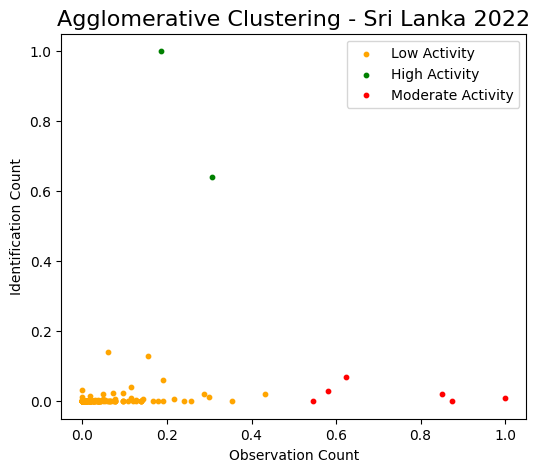

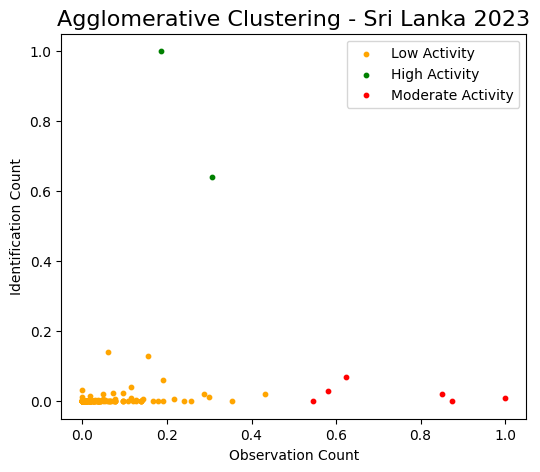

In [37]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    df_cluster = perform_agglomerative_clustering(df_processed, year)
    plot_clusters(df_clustered,year)
    


In [61]:
## another method to implement 

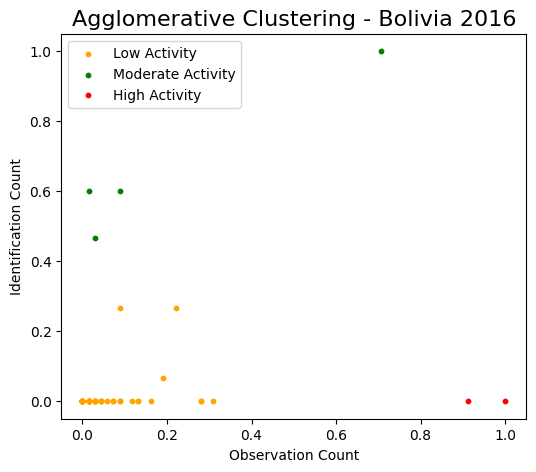

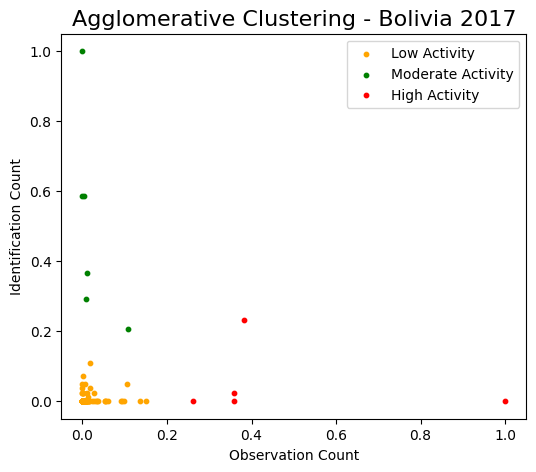

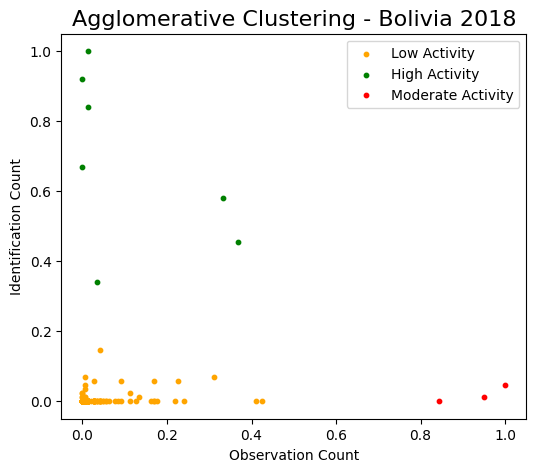

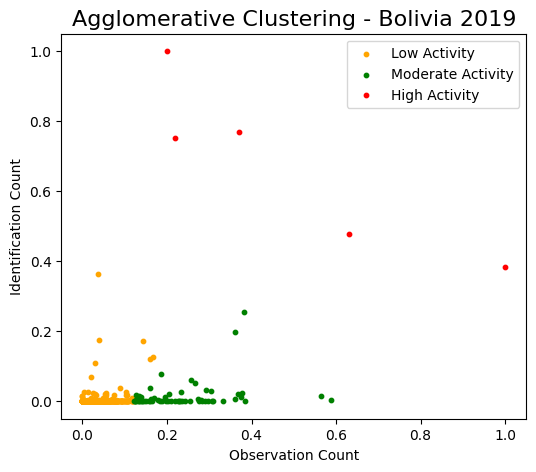

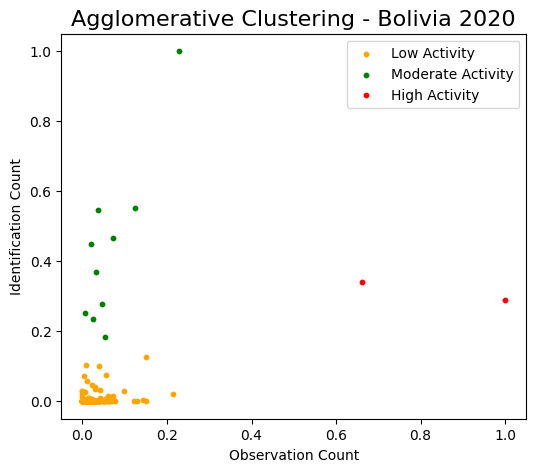

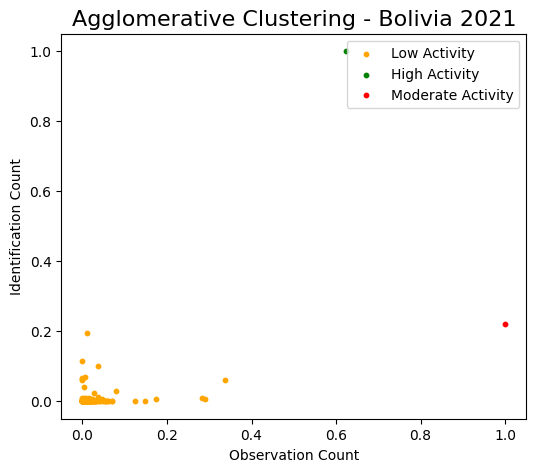

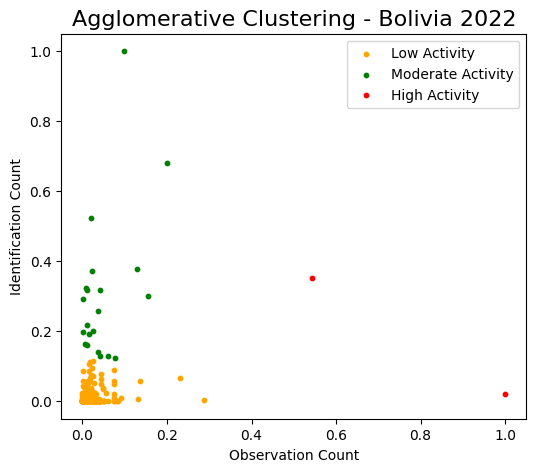

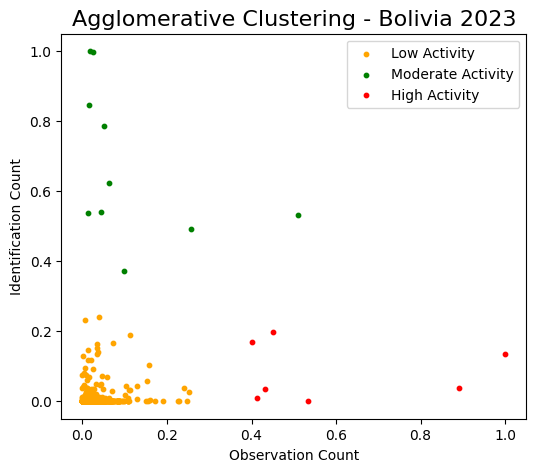

In [59]:
def process_dataframe(df, year):
    df_std, scaler = selectfeature(df)
    df_clustered = perform_agglomerative_clustering(df_std, year)
    plot_clusters(df_clustered, year)
    return df_clustered

df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

for df, year in zip(df_list, years):
    processed_df = process_dataframe(df, year)

In [60]:
df_clustered

,user_id,n_obs,n_idents,cluster,activity_level
4172,4393,0.029345,0.000000,0,Low Activity
4124,5245,0.049288,0.000236,0,Low Activity
74,9414,0.008547,0.025683,0,Low Activity
4004,11986,0.000285,0.007069,0,Low Activity
4069,12525,0.000000,0.000000,0,Low Activity
...,...,...,...,...,...
4314,8082754,0.000000,0.000000,0,Low Activity
4324,8085024,0.000000,0.000000,0,Low Activity
4326,8085291,0.000000,0.000000,0,Low Activity
4331,8092781,0.000000,0.000000,0,Low Activity


In [52]:
## Dendrograms 

In [ ]:
def plot_dendrogram(df,year):
    # Plotting the dendrogram
    plt.figure(figsize=(10, 7))
    Z = linkage(df[['n_obs', 'n_idents']], method='ward')
    dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
    plt.title('Dendrogram')
    plt.xlabel('Data Points')
    plt.ylabel('Euclidean Distances')
    plt.show()

In [ ]:
plot_dendrogram(df_std,2019)

In [37]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram

# Non Linear Clustering 
## DBSCAN

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
def selectfeature(df):
    # Select features
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column 
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to  two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_dbscan_clustering(df, year):
    # Define color palette
    palette = ['orange', 'green', 'red']  # 
    
    # Perform DBSCAN clustering
    dbscan = DBSCAN(eps=0.2, min_samples=5).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = dbscan.labels_
    
    # Count of unique clusters
    labels = dbscan.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f'Estimated number of clusters: {n_clusters}')
    print(f'Estimated number of noise points: {n_noise}')
    
    # Get unique cluster labels
    unique_labels = set(labels)
    print("Unique labels (clusters):", unique_labels)

    # Plot clusters
    plt.figure(figsize=(6, 5))
    
    # Iterate over unique labels
    for label in unique_labels:
        # Assign color or use black for noise
        if label == -1:
            color = 'black'
            label_name = 'Noise'
        else:
            color = palette[label % len(palette)]
            label_name = f'Cluster {label}'
        
        # Filter data points belonging to the current label
        cluster_data = df[df['cluster'] == label]
        plt.scatter(cluster_data['n_obs'], cluster_data['n_idents'], 
                    s=10, color=color, label=label_name)
    
    # Set title and labels
    plt.title(f'DBScan clustering - Sri Lanka {year}', fontsize=16)
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend()
    plt.show()

    return df
#test
# df_std, scaler = selectfeature(df)
# df_clustered = perform_dbscan_clustering(df_std, 2023)


Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


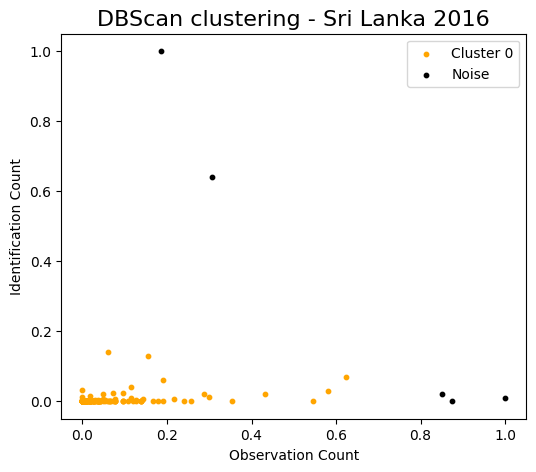

In [42]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2016)

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


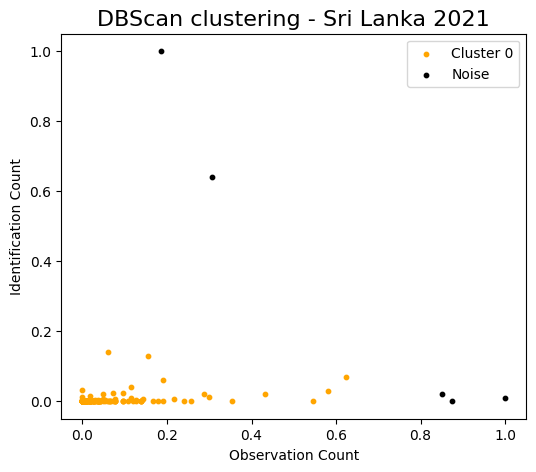

In [43]:
df_std, scaler = selectfeature(df)
df_clustered = perform_dbscan_clustering(df_std, 2021)

Estimated number of clusters: 1
Estimated number of noise points: 2
Unique labels (clusters): {0, -1}


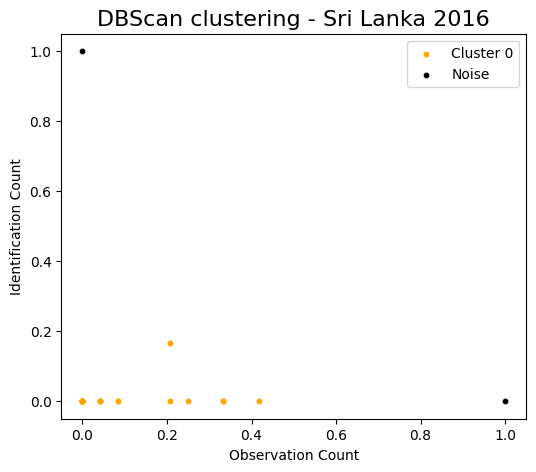

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


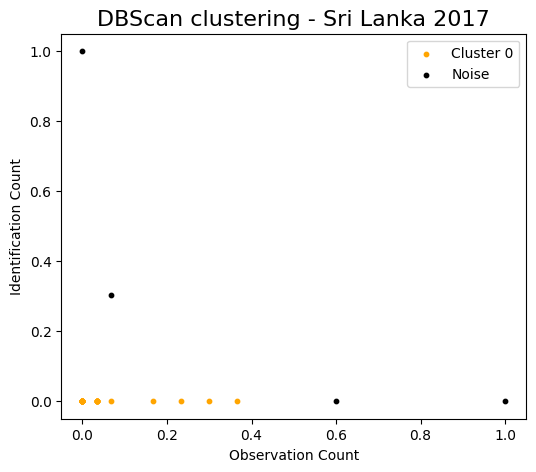

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


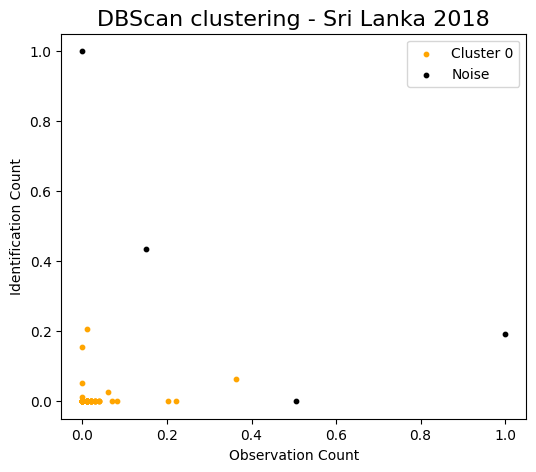

Estimated number of clusters: 1
Estimated number of noise points: 4
Unique labels (clusters): {0, -1}


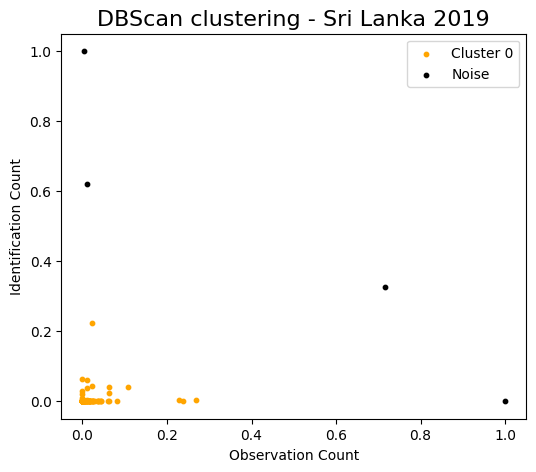

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


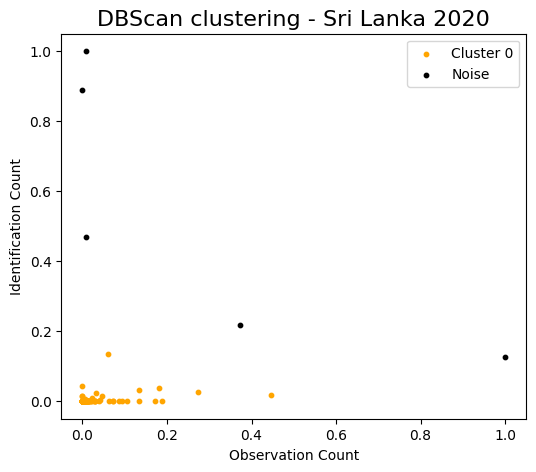

Estimated number of clusters: 1
Estimated number of noise points: 2
Unique labels (clusters): {0, -1}


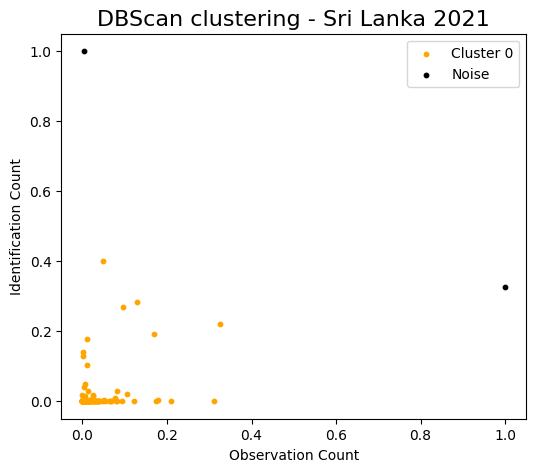

Estimated number of clusters: 1
Estimated number of noise points: 6
Unique labels (clusters): {0, -1}


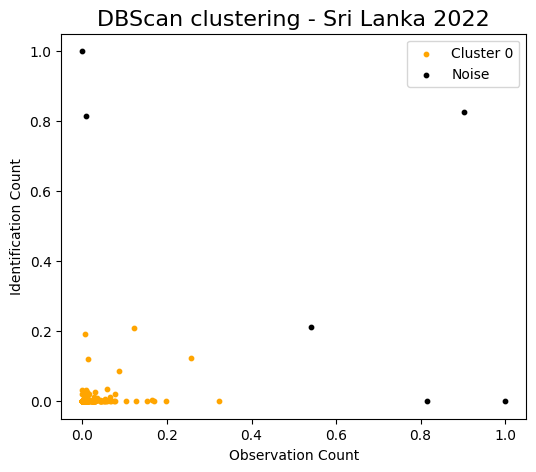

Estimated number of clusters: 1
Estimated number of noise points: 5
Unique labels (clusters): {0, -1}


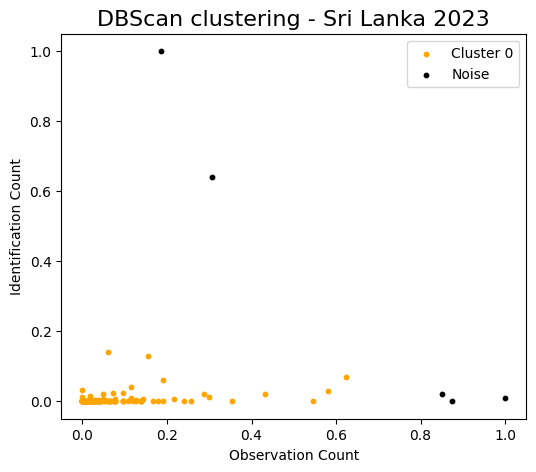

In [44]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_dbscan_clustering(df_processed, year)

Estimated number of clusters: 2
Estimated number of noise points: 3
Unique labels (clusters): {0, 1, -1}


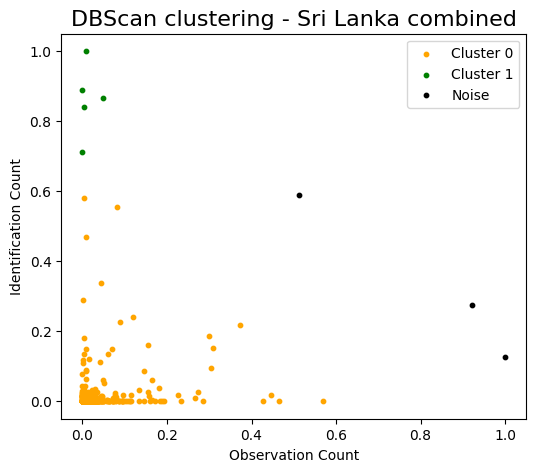

,user_id,n_obs,n_idents,cluster
192,3016,0.000000,0.000000,0
1,4857,0.001590,0.000000,0
30,5365,0.101749,0.000000,0
15,8828,0.003180,0.006863,0
20,8828,0.000000,0.017647,0
...,...,...,...,...
216,8127063,0.036566,0.000980,0
217,8164646,0.000000,0.000000,0
81,8269917,0.000000,0.000000,0
151,8269917,0.000000,0.000000,0


In [45]:
# merge all  DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
combined_df_dbscan = pd.concat(df_list)

# Process the combined DataFrame
df_combined_processed, scaler_combined = selectfeature(combined_df_dbscan)

# Perform clustering 
perform_dbscan_clustering(df_combined_processed, "combined")

# Gaussian Mixture Model (GMM)

In [48]:
from sklearn.mixture import GaussianMixture

In [49]:
def selectfeature(df):
    # Select variables for plotting
    df_select = df[['user_id', 'n_obs', 'n_idents']]

    # Create a copy of the dataframe
    df_std = df_select.copy()

    # Don't include the user_id column in the transformation
    col_names = ['n_obs', 'n_idents']
    features = df_std[col_names]
    scaler = MinMaxScaler().fit(features)
    features = scaler.transform(features)

    # Assign the result to those two columns
    df_std[col_names] = features
    df_std.sort_values('user_id', inplace=True)
    
    return df_std, scaler

def perform_gmm_clustering(df, year):
    palette = ['orange', 'green', 'red']  # Low to High Activity
    gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=0)
    df['cluster'] = gmm.fit_predict(df[['n_obs', 'n_idents']])

    means = gmm.means_
    sorted_indices = np.argsort(means[:, 0])  # Sort by `n_obs` for consistent labeling
    new_labels = np.zeros_like(df['cluster'])
    for old_label, new_label in enumerate(sorted_indices):
        new_labels[df['cluster'] == old_label] = new_label
    df['cluster'] = new_labels  # Apply new labels

    means_df = pd.DataFrame(means, columns=['n_obs', 'n_idents'])
    log_likelihood = gmm.score(df[['n_obs', 'n_idents']])
    
    plt.figure(figsize=(6, 5))
    for i in range(3):
        plt.scatter(df[df['cluster'] == i]['n_obs'], df[df['cluster'] == i]['n_idents'], color=palette[i])
    plt.scatter(means[:, 0], means[:, 1], c='black', s=10, alpha=0.6, marker='*')
    plt.title(f'GMM Clusters Sri Lanka- {year}')
    plt.xlabel('Observation Count')
    plt.ylabel('Identification Count')
    plt.legend(['Low Activity', 'Moderate Activity', 'High Activity', 'Means'])
    plt.show()

    return df, log_likelihood
# test
# df_std, scaler = selectfeature(df)
# df_clustered, log_likelihood = perform_gmm_clustering(df_std, 2023)


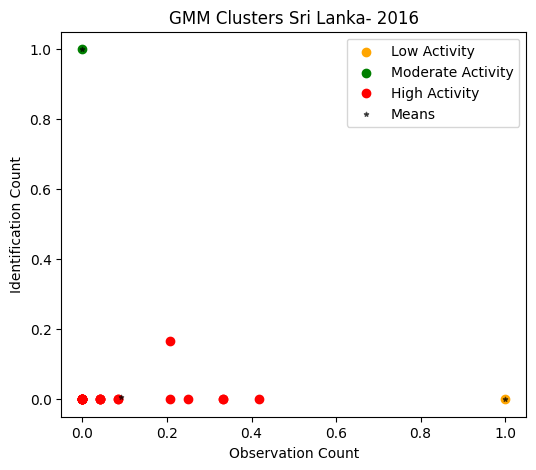

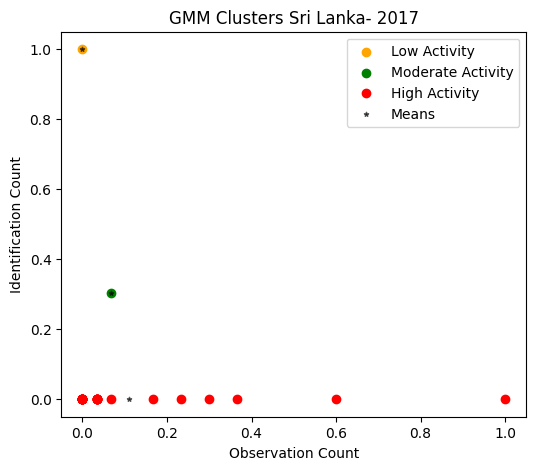

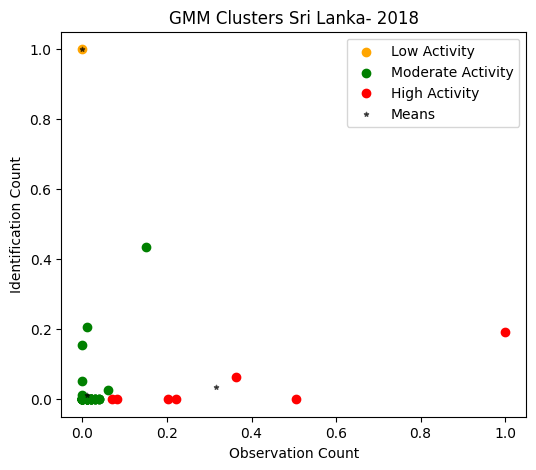

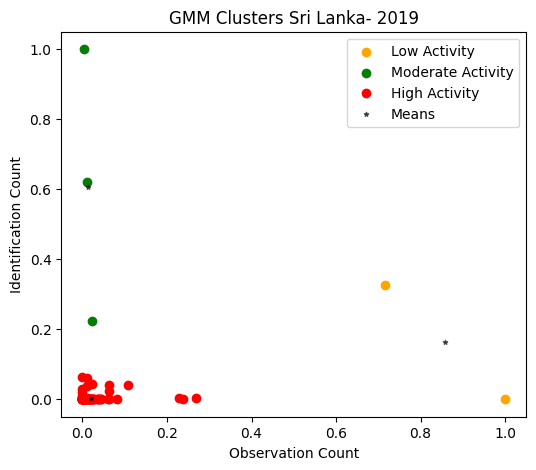

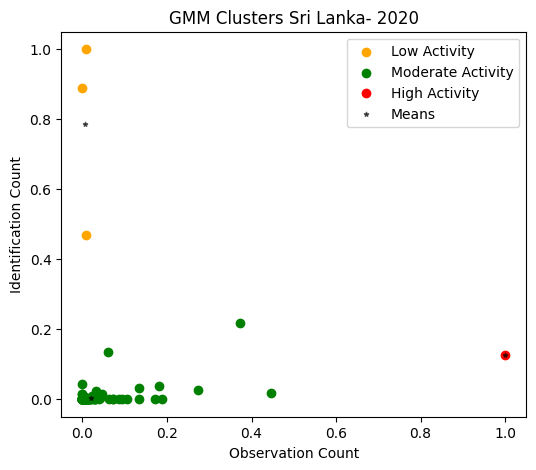

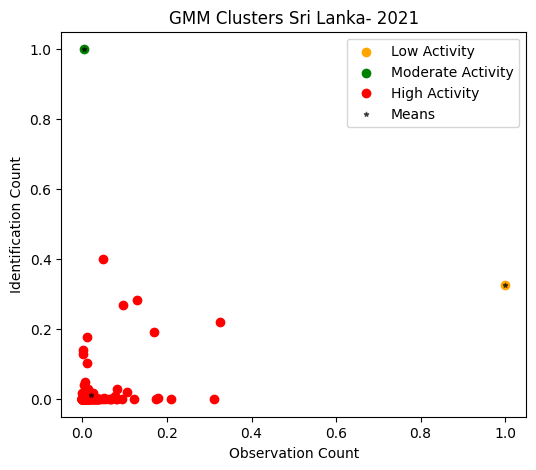

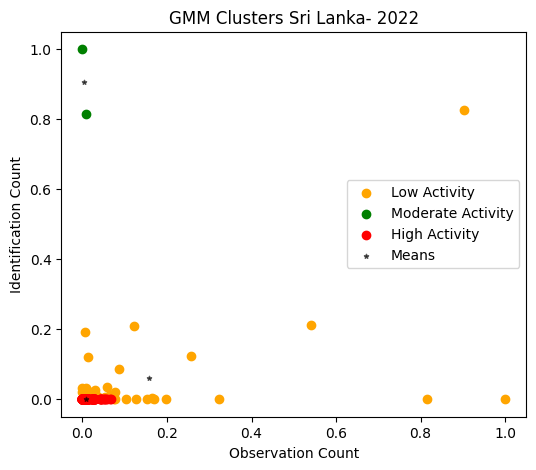

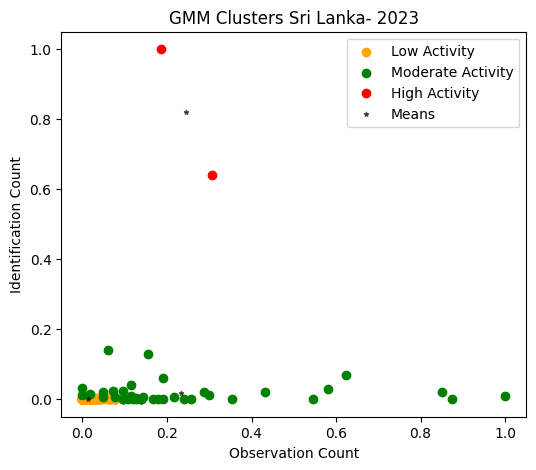

In [50]:
# List of DataFrames
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Process each DataFrame

for df, year in zip(df_list, years):
    df_processed, scaler = selectfeature(df)
    perform_gmm_clustering(df_processed, year)

## Evaluating the scores to find the better model

In [51]:
from sklearn.metrics import silhouette_score

In [52]:
def perform_kmeans_clustering(df, year):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(df[['n_obs', 'n_idents']])
    df['cluster'] = kmeans.labels_
    
    # Calculate the sum of squared errors (SSE)
    sse = kmeans.inertia_
    
    return df, sse


In [53]:
# List of DataFrames and years
df_list = [sf_2016, sf_2017, sf_2018, sf_2019, sf_2020, sf_2021, sf_2022, sf_2023]
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Loop through each DataFrame andg year
silhouette_scores = []

for df, year in zip(df_list, years):

    # scale feature 
    df_std, scaler = selectfeature(df)
    
    # Perform K-means clustering
    df_clustered, sse = perform_kmeans_clustering(df_std, year)
    
    # get cluster lable
    clusters_kmeans = df_clustered['cluster'].values
    
    # Step 4: Calculate and store the Silhouette Score
    silhouette_avg = silhouette_score(df_std[['n_obs', 'n_idents']], clusters_kmeans)
    silhouette_scores.append((year, silhouette_avg))
    print(f"Silhouette Score for {year}: {silhouette_avg}")

# Print all silhouette scores
#print("\nSilhouette Scores by Year:")
#for year, score in silhouette_scores:
    #print(f"Year {year}: {score}")


Silhouette Score for 2016: 0.7645147568061019
Silhouette Score for 2017: 0.7368734823235544
Silhouette Score for 2018: 0.8847101465084519
Silhouette Score for 2019: 0.9298753529820825
Silhouette Score for 2020: 0.9306086569236759
Silhouette Score for 2021: 0.9358061655587724
Silhouette Score for 2022: 0.9439326083362752
Silhouette Score for 2023: 0.8950171031211307
